# Universidade Federal de Alagoas - Instituto de Computação
## **2a lista de exercícios**


---

Alunos: Anderson Clemente, Ester de Lima.

Nas questões 1, 2, 3 e 4, você será avaliado principalmente pela sua análise,
e não apenas pela implementação.

In [1]:
from google.colab import drive, files
drive.mount('/content/gdrive/', force_remount=True)
from google.colab.patches import cv2_imshow
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt

Mounted at /content/gdrive/


1. Na documentção da OpenCV é possível encontrar diversos [detectores e descritores](https://docs.opencv.org/4.5.3/db/d27/tutorial_py_table_of_contents_feature2d.html). Usando um conjunto com pelo menos 6 imagens (você pode tirar fotos com seu telefone, por exemplo), experimente três detectores distintos nestas imagens, incluindo o detector de Harris. Pesquise e descreva resumidamente com suas palavras (até 200 palavras para cada) como cada um funciona, incluindo seus parâmetros e quais suas principais diferenças. Exiba resultados nas suas imagens, e em quais situações cada um funciona bem ou mal. Discuta seus parâmetros. Qual deles você achou melhor? Justifique.

In [2]:
sourcePath = "/content/gdrive/MyDrive/8º Periodo/Visão computacional/sources/"

In [3]:
liberty_statue = cv2.imread(sourcePath + 'liberty_statue.png')
palacio = cv2.imread(sourcePath + 'palacio.jpg')
pic1 = cv2.imread(sourcePath + 'pic1.jpg')
pic2 = cv2.imread(sourcePath + 'pic2.jpg')
pic3 = cv2.imread(sourcePath + 'pic3.jpg')
pic4 = cv2.imread(sourcePath + 'pic4.jpg')

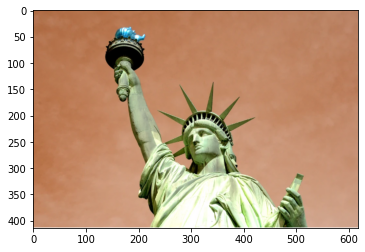

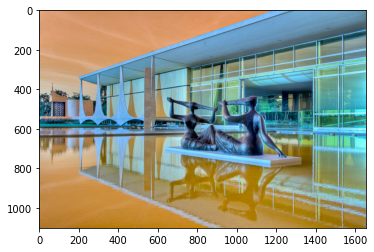

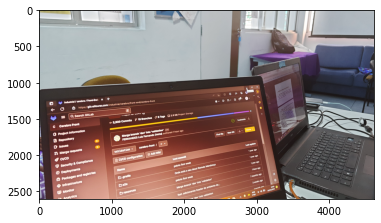

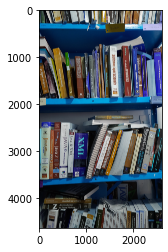

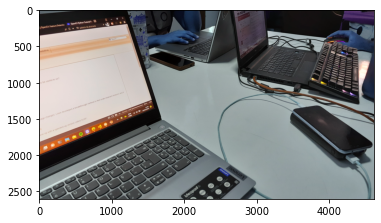

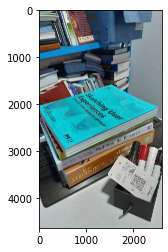

In [4]:
plt.imshow(liberty_statue)
plt.show()
plt.imshow(palacio)
plt.show()
plt.imshow(pic1)
plt.show()
plt.imshow(pic2)
plt.show()
plt.imshow(pic3)
plt.show()
plt.imshow(pic4)
plt.show()

O Algoritmo de Harris funciona através da análise de mudanças de intensidade quando uma pequena janela da imagem é movida em todas as direções. A mudança de intensidade é calculada aplicando um kernel ao gradiente da imagem. Neste algoritmo, é calculada as derivadas verticais e horinzontais da imagem observando onde essas derivadas são máximas simultaneamente. Na função abaixo, foram usados os parametros $blockSize$, $ksize$ e $k$.


*   blockSize: usado para definir o tamanho do bloco usado no calculo da matriz de covariancia da imagem em cada ponto.
*   ksize: o tamanho do filtro da derivada de Sobel usado para calcular os gradientes na imagem.
*   K: é a constante de ajuste usada no calculo da resposta do detector, controlando a sensibilidade do detector.



In [5]:
def cornerHarrys(img, blockSize, ksize, k, plot = False, n = None):
  gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gray_img = np.float32(gray_img)

  dst = cv2.cornerHarris(gray_img, blockSize, ksize, k)
  dst = cv2.dilate(dst, None)

  img[dst > 0.01 * dst.max()]=[0, 0, 255]
  if plot and n != None:
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(n, n))
    plt.imshow(img_RGB)
  return img

O algoritmo Shi-Tomasi é uma modificação do detector de Harris. Este detector funciona calculando os autovalores de uma matriz que é a combinação das derivadas da imagem nas direções X e Y. O menor autovalor é usado como referencia da qualidade do canto. Se o autovalor minimo é maior do que um valor limiar, então esse ponto é considerado um canto. Por não utilizar o determinante da matriz, como no caso do detector de Harris, este algoritmo dá mais importancia para cantos e bordas com baixos altovalores, sendo mais robusto com ruidos. Na função abaixo foram utilizados os parametros $maxCorners$, $qualityLevel$ e $minDistance$.


*   maxCorners: Quantidade maxima de cantos para ser retornado, caso existam mais cantos do que esse valor, será retornado os cantos mais fortes.
*   qualityLevel: a qualidade minima do canto.
*   minDistance: a distancia minima entre dois cantos, dois cantos estejam muito proximos, o mais fraco é descartado.



In [6]:
def shi_tomasi(img, corners, qlt_lvl, d, plot = False, n = None):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  corners_img = cv2.goodFeaturesToTrack(gray, corners, qlt_lvl, d)
      
  corners_img = np.int0(corners_img)
  for corners in corners_img:
      x,y = corners.ravel()
      cv2.circle(img,(x,y),3,[255,0,0],-1)
  if plot and n != None:
    plt.figure(figsize=(n, n))
    plt.imshow(img)
  
  return img

O algoritmo FAST funciona pela analise de brilho de um pixel ao redor de outro pixel central. Se exisistir um conjunto de pelo menos n pixels nessa vizinhaça com  brilho mais escuro do que o pixel central por um valor limiar t então o pixel central é considerado um canto. Para acelerar a detecção, primeiro é identificado quais pixels provavelmente são cantos procurando conjuntos contiguos de pixels em um anel ao redor de um pixel centrao que sejam todos mais brilhantes ou mais escuros do que o pixel central.
Neste algoritmo foi utilizado somente os parametros 'image' e 'mask', onde 'image' é a imagem em escala de cinza e 'mask' foi setada como none, pois deve ser considerada toma a imagem e não apenas uma região dela.

In [7]:
def FAST(img, plot = False, n = None):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  fast = cv2.FastFeatureDetector_create()
  keypoints = fast.detect(gray, None)
  img_with_keypoints = cv2.drawKeypoints(img, keypoints, None, color=(0,255,0))
  if plot and n != None:
    plt.figure(figsize=(n, n))
    plt.imshow(img_with_keypoints)
  return img_with_keypoints

In [8]:
liberty_cornerHarrys = cornerHarrys(liberty_statue, 2, 7, 0.07)
liberty_statue = cv2.imread(sourcePath + 'liberty_statue.png')
liberty_shi = shi_tomasi(liberty_statue, 1000, 0.01, 10)
liberty_statue = cv2.imread(sourcePath + 'liberty_statue.png')
liberty_fast = FAST(liberty_statue)
liberty_comp = np.hstack((liberty_statue, liberty_cornerHarrys, liberty_shi, liberty_fast))
plt.figure(figsize=(50, 50))
plt.imshow(liberty_comp)

palacio = cv2.imread(sourcePath + 'palacio.jpg')
palacio_cornerHarrys = cornerHarrys(palacio, 2, 7, 0.07)
palacio = cv2.imread(sourcePath + 'palacio.jpg')
palacio_shi = shi_tomasi(palacio, 1000, 0.01, 10)
palacio = cv2.imread(sourcePath + 'palacio.jpg')
palacio_fast = FAST(palacio)
palacio_comp = np.hstack((palacio, palacio_cornerHarrys, palacio_shi, palacio_fast))
plt.figure(figsize=(50, 50))
plt.imshow(palacio_comp)

pic1 = cv2.imread(sourcePath + 'pic1.jpg')
pic1_cornerHarrys = cornerHarrys(pic1, 2, 7, 0.07)
pic1 = cv2.imread(sourcePath + 'pic1.jpg')
pic1_shi = shi_tomasi(pic1, 1000, 0.01, 10)
pic1 = cv2.imread(sourcePath + 'pic1.jpg')
pic1_fast = FAST(pic1)
pic1_comp = np.hstack((pic1, pic1_cornerHarrys, pic1_shi, pic1_fast))
plt.figure(figsize=(50, 50))
plt.imshow(pic1_comp)

pic2 = cv2.imread(sourcePath + 'pic2.jpg')
pic2_cornerHarrys = cornerHarrys(pic2, 2, 7, 0.07)
pic2 = cv2.imread(sourcePath + 'pic2.jpg')
pic2_shi = shi_tomasi(pic2, 1000, 0.01, 10)
pic2 = cv2.imread(sourcePath + 'pic2.jpg')
pic2_fast = FAST(pic2)
pic2_comp = np.hstack((pic2, pic2_cornerHarrys, pic2_shi, pic2_fast))
plt.figure(figsize=(50, 50))
plt.imshow(pic2_comp)

pic3 = cv2.imread(sourcePath + 'pic3.jpg')
pic3_cornerHarrys = cornerHarrys(pic3, 2, 7, 0.07)
pic3 = cv2.imread(sourcePath + 'pic3.jpg')
pic3_shi = shi_tomasi(pic3, 1000, 0.01, 10)
pic3 = cv2.imread(sourcePath + 'pic3.jpg')
pic3_fast = FAST(pic3)
pic3_comp = np.hstack((pic3, pic3_cornerHarrys, pic3_shi, pic3_fast))
plt.figure(figsize=(50, 50))
plt.imshow(pic3_comp)

pic4 = cv2.imread(sourcePath + 'pic4.jpg')
pic4_cornerHarrys = cornerHarrys(pic4, 2, 7, 0.07)
pic4 = cv2.imread(sourcePath + 'pic4.jpg')
pic4_shi = shi_tomasi(pic4, 1000, 0.01, 10)
pic4 = cv2.imread(sourcePath + 'pic4.jpg')
pic4_fast = FAST(pic4)
pic4_comp = np.hstack((pic4, pic4_cornerHarrys, pic4_shi, pic4_fast))
plt.figure(figsize=(50, 50))
plt.imshow(pic4_comp)

'''É possivel ampliar a imagem clicando nela para melhor visualização.
  Azul: detector de Harris
  Vermelho: Shi-Tomasi
  Verde: FAST
'''

Output hidden; open in https://colab.research.google.com to view.

Percebemos que o detector de Harris perde alguns cantos comparado ao detector Shi-Tomasi, e considerando que este ultimo detector é mais vantajoso em ambientes de maior ruido, considero o Shi-Tomasi o melhor algoritmo. Já o algoritmo FAST detectou muitos cantos errados, principalmente em regiões de reflexão de luz e em bordas, sendo não muito preciso porem muito rápido em preencher a imagem os pontos.

2. Repita o mesmo procedimento acima para 3 tipos de descritores,
incluindo o SIFT.

O descritor SIFT (Scale-Invariant Feature Transform) é um método de extração de características que é capaz de identificar pontos de interesse em diferentes escalas e orientações. Ele funciona calculando o histograma de gradientes de cada ponto de interesse, levando em consideração a orientação do gradiente em cada pixel vizinho. Isso produz um vetor de características que é robusto à rotação, escala e mudanças na iluminação da imagem. O parâmetro mais importante do SIFT é o número de níveis de escala que serão usados para detectar pontos de interesse.




Calculamos a resposta do detector de Harris em quatro imagens em escala de cinza e destacamos os cantos detectados em cada uma delas com um quadrado rosa. A resposta do detector de Harris é calculada e vai recebe como entrada a imagem em escala de cinza, o tamanho do bloco utilizado para a detecção de cantos, o tamanho da janela de filtro Sobel e um parâmetro k que controla a sensibilidade da detecção de cantos. 

In [10]:
img1 = cv2.imread(sourcePath+'pic1.jpg')
img2 = cv2.imread(sourcePath+'pic2.jpg')
img3 = cv2.imread(sourcePath+'pic3.jpg')
img4 = cv2.imread(sourcePath+'pic4.jpg')


img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3_rgb = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
img4_rgb = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)

In [11]:
gray1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
gray3 = cv2.cvtColor(img3,cv2.COLOR_BGR2GRAY)
gray4 = cv2.cvtColor(img4,cv2.COLOR_BGR2GRAY)

blockSize = 3
ksize = 5
k = 0.04

dst1 = cv2.cornerHarris(gray1, blockSize, ksize, k)
dst2 = cv2.cornerHarris(gray2, blockSize, ksize, k)
dst3 = cv2.cornerHarris(gray3, blockSize, ksize, k)
dst4 = cv2.cornerHarris(gray4, blockSize, ksize, k)


dst1 = cv2.dilate(dst1,None)
dst2 = cv2.dilate(dst2,None)
dst3 = cv2.dilate(dst3,None)
dst4 = cv2.dilate(dst4,None)


harris1 = np.copy(img1)
harris1[dst1>0.03*dst1.max()] = [255,0,255]
harris2 = np.copy(img2)
harris2[dst2>0.03*dst2.max()] = [255,0,255]
harris3 = np.copy(img3)
harris3[dst3>0.03*dst3.max()] = [255,0,255]
harris4 = np.copy(img4)
harris4[dst4>0.03*dst4.max()] = [255,0,255]


fig, ax = plt.subplots(3,2,figsize=(100,40))
ax[0][0].imshow(cv2.cvtColor(harris1, cv2.COLOR_BGR2RGB))
ax[1][0].imshow(cv2.cvtColor(harris2, cv2.COLOR_BGR2RGB))
ax[2][0].imshow(cv2.cvtColor(harris3, cv2.COLOR_BGR2RGB))
ax[0][1].imshow(cv2.cvtColor(harris4, cv2.COLOR_BGR2RGB))

Output hidden; open in https://colab.research.google.com to view.

O loop for percorre cada item na lista de imagens e para cada imagem, usamos o SIFT para detectar os pontos de interesse e calcular suas descritas. Esses pontos são desenhados na imagem original usando, e as imagens resultantes são adicionadas a uma lista keypoints_draw. As listas keypoints_sift e descriptors_sift são preenchidas com os pontos de interesse e as descritas correspondentes de cada imagem.

In [12]:
sift = cv2.SIFT_create()

imgs = [(img1,gray1), (img2,gray2), (img3,gray3), (img4,gray4)]
keypoints_draw = []
keypoints_sift = []
descriptors_sift = []

for item in imgs:
  keyp, desc1 = sift.detectAndCompute(item[1], None)
  keyp_draw = cv2.drawKeypoints(item[0], keyp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
  
  keypoints_sift.append(keyp)
  keypoints_draw.append(keyp_draw)
  descriptors_sift.append(desc1)

In [13]:
fig, ax = plt.subplots(3,2,figsize=(100,40))
ax[0][0].imshow(cv2.cvtColor(keypoints_draw[0], cv2.COLOR_BGR2RGB))
ax[1][0].imshow(cv2.cvtColor(keypoints_draw[1], cv2.COLOR_BGR2RGB))
ax[2][0].imshow(cv2.cvtColor(keypoints_draw[2], cv2.COLOR_BGR2RGB))
ax[0][1].imshow(cv2.cvtColor(keypoints_draw[3], cv2.COLOR_BGR2RGB))

Output hidden; open in https://colab.research.google.com to view.

In [14]:
imgs = [(img1_rgb,gray1), (img2_rgb,gray2), (img3_rgb,gray3), (img4_rgb,gray4)]

keypoints_draw = []
keypoints_sift = []
descriptors_sift = []

for item in imgs:
  keyp, desc1 = sift.detectAndCompute(item[1], None)
  keyp_draw = cv2.drawKeypoints(item[0], keyp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
  
  keypoints_sift.append(keyp)
  keypoints_draw.append(keyp_draw)
  descriptors_sift.append(desc1)

**BRIEF**

Realizamos a extração de características de uma imagem usando o método STAR detector e o descritor BRIEF. Primeiro, criamos um detector STAR. Em seguida, o detector é utilizado para detectar os pontos-chave.

Em seguida, criamos um descritor BRIEF, é então usado para computar os descritores BRIEF para cada um dos keypoints detectados anteriormente. Por fim, a sáida será tamanho do descritor e a forma da matriz dos descritores.

In [15]:
star = cv2.xfeatures2d.StarDetector_create()
kp_brief = star.detect(gray1,None)

brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()
kp_brief, des_brief = brief.compute(gray1, kp_brief)
print( brief.descriptorSize() )
print( des_brief.shape)

32
(6776, 32)


**ORB**

Primeiro fizemos uma rotação de 30 graus na imagem para gerar uma imagem rotacionada "rotate". Em seguida, implementamos uma instância do objeto ORB usando, ele detecta os keypoints nas imagens. E então calcula os descritores de cada conjunto de keypoints. Por fim, manda a saída na forma dos descritores "des_orb".

In [16]:
num_rows, num_cols = gray1.shape[:2]
rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 30, 1)
rotate = cv2.warpAffine(gray1, rotation_matrix, (num_cols, num_rows))

orb = cv2.ORB_create()

kp_orb = orb.detect(gray1,None)
kp2_orb = orb.detect(rotate,None)

kp_orb, des_orb = orb.compute(gray1, kp_orb)
kp2_orb, des2_orb = orb.compute(rotate, kp2_orb)
print( des_orb.shape)

(500, 32)


3. Repita o mesmo procedimento acima para 3 algoritmos de geração de correspondências (matching).

O algoritmo FLANN consiste na contrução de um indice com clusterização hierarquica do k-means, kd-trees aleatorios e Locality Sensitive Hashing. Esses algoritmos trabalham dividindo o conjunto de dados em subespaços ou clusters menores e armazenando informações sobre a distribuição de dados nesses subespaços. O indice é usado para encontrar os vizinhos mais proximos do ponto de consulta procurando no indice o cluster ou o subespaço mais proximo ao ponto de consulta e em seguida procurando os vizinhos mais proximos dentro desse cluster.
Os parametros da função abaixo consiste na foto de base, no fragmento da imagem, o indice do kdTree, a quantidade de arvores e o numero de checagens.

In [17]:
def FLANN(src, frag, idx_kdtree = 0, trees = 5, checks = 50, k = 2, n = 5):
  sift = cv2.SIFT_create()
  kp1, des1 = sift.detectAndCompute(src, None)
  kp2, des2 = sift.detectAndCompute(frag, None)
  index_params = dict(algorithm = idx_kdtree, t = trees)
  search_params = dict(cks = checks)
  flann = cv2.FlannBasedMatcher(index_params,search_params)
  matches = flann.knnMatch(des1, des2, k)
  matchesMask = [[0,0] for i in range(len(matches))]
  for i,(m,n) in enumerate(matches):
    if m.distance < 0.1*n.distance:
      matchesMask[i]=[1,0]
  draw_params = dict(matchColor = (0,255,0),singlePointColor = (255,0,0),matchesMask = matchesMask,flags = 0)
  img3 = cv2.drawMatchesKnn(src, kp1, frag, kp2, matches, None, **draw_params)
  plt.figure(figsize=(15, 15))
  plt.imshow(img3)
  plt.show()

No SIFT a imagem é suavizada com o filtro Gaussiano em diferentes escalas para detectar potenciais pontos de interesse em varias escalas. O algoritmo elimina o baixo contraste ou pontos ruins e atribui orientações aos pontos restantes. Depois é gerado um vetor de descrição para cada ponto consideranto a magnitude do gradiente do pixel no ponto da vizinhança, e então o descritor do ponto em duas imagens são comparados para encontrar pontos correspondentes. Os parametros da função são relativos ao desenho dos matches, onde M é o numero de matches e flag conecta os pontos com linhas retas.

In [18]:
def SIFT(src, frag, m=50, flag=2):
  sift = cv2.SIFT_create()
  kp1, des1 = sift.detectAndCompute(src, None)
  kp2, des2 = sift.detectAndCompute(frag,None)
  bf = cv2.BFMatcher()
  matches = bf.match(des1,des2)
  matches = sorted(matches, key=lambda val: val.distance)
  out = cv2.drawMatches(src, kp1, frag, kp2, matches[:m], None, flags=flag)
  plt.figure(figsize=(15, 15))
  plt.imshow(out)
  plt.show()

NO ORB é utilizado o algoritmo FAST para detectar os pontos, em cada ponto é utilizado um descritor binario do tipo BRIEF para computar um vetor descritivo para cada ponto. BRIEF compara pares de pixels na vizinhaça dos pontos e atribui um valor binario para cada comparação baseada na intensidade relativa de cada pixel. Os pontos são combinados entre duas imagens comparando os vetores descritivos usando metricas de distancia. Os parametros da função são relativos ao desenho dos matches, onde M é o numero de matches e flag conecta os pontos com linhas retas.

In [19]:
def ORB(src, frag, m = 50, flag = 2):
  orb = cv2.ORB_create()
  kp1, des1 = orb.detectAndCompute(src, None)
  kp2, des2 = orb.detectAndCompute(frag,None)
  bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
  matches = bf.match(des1,des2)
  matches = sorted(matches, key = lambda x:x.distance)
  out = cv2.drawMatches(src, kp1, frag, kp2, matches[:m], None, flags=flag)
  plt.figure(figsize=(15, 15))
  plt.imshow(out)
  plt.show()

In [20]:
camaro = cv2.imread(sourcePath + 'camaro.jpg')
cropped = cv2.imread(sourcePath + 'cropped_cmr.jpg')
FLANN(camaro, cropped)
camaro = cv2.imread(sourcePath + 'camaro.jpg')
cropped = cv2.imread(sourcePath + 'cropped_cmr.jpg')
SIFT(camaro, cropped)
camaro = cv2.imread(sourcePath + 'camaro.jpg')
cropped = cv2.imread(sourcePath + 'cropped_cmr.jpg')
ORB(camaro, cropped)

palacio = cv2.imread(sourcePath + 'palacio.jpg')
cropped = cv2.imread(sourcePath + 'palacio-cropped.jpg')
FLANN(palacio, cropped)
palacio = cv2.imread(sourcePath + 'palacio.jpg')
cropped = cv2.imread(sourcePath + 'palacio-cropped.jpg')
SIFT(palacio, cropped)
palacio = cv2.imread(sourcePath + 'palacio.jpg')
cropped = cv2.imread(sourcePath + 'palacio-cropped.jpg')
ORB(palacio, cropped)

gripen = cv2.imread(sourcePath + 'gripen1.jpg')
cropped = cv2.imread(sourcePath + 'gripen-cropped.jpg')
FLANN(gripen, cropped)
gripen = cv2.imread(sourcePath + 'gripen1.jpg')
cropped = cv2.imread(sourcePath + 'gripen-cropped.jpg')
SIFT(gripen, cropped)
gripen = cv2.imread(sourcePath + 'gripen1.jpg')
cropped = cv2.imread(sourcePath + 'gripen-cropped.jpg')
ORB(gripen, cropped)

f1 = cv2.imread(sourcePath + 'f1.jpg')
cropped = cv2.imread(sourcePath + 'f1-01.jpeg')
FLANN(f1, cropped)
f1 = cv2.imread(sourcePath + 'f1.jpg')
cropped = cv2.imread(sourcePath + 'f1-01.jpeg')
SIFT(f1, cropped)
f1 = cv2.imread(sourcePath + 'f1.jpg')
cropped = cv2.imread(sourcePath + 'f1-01.jpeg')
ORB(f1, cropped)

pic4 = cv2.imread(sourcePath + 'pic4.jpg')
cropped = cv2.imread(sourcePath + 'pic4-cropped.jpg')
FLANN(pic4, cropped)
pic4 = cv2.imread(sourcePath + 'pic4.jpg')
cropped = cv2.imread(sourcePath + 'pic4-cropped.jpg')
SIFT(pic4, cropped)
pic4 = cv2.imread(sourcePath + 'pic4.jpg')
cropped = cv2.imread(sourcePath + 'pic4-cropped.jpg')
ORB(pic4, cropped)

panther = cv2.imread(sourcePath + 'panther.jpg')
cropped = cv2.imread(sourcePath + 'panther-cropped.jpeg')
FLANN(panther, cropped)
panther = cv2.imread(sourcePath + 'panther.jpg')
cropped = cv2.imread(sourcePath + 'panther-cropped.jpeg')
SIFT(panther, cropped)
panther = cv2.imread(sourcePath + 'panther.jpg')
cropped = cv2.imread(sourcePath + 'panther-cropped.jpeg')
ORB(panther, cropped)

Output hidden; open in https://colab.research.google.com to view.

4. Escolha e descreva uma metodologia completa para geração de correspondências. Experimente 3 quantidades distintas de correspondências retornadas, variando parâmetros dos algoritmos. Aplique esta metodologia em duas imagens, exiba e discuta a qualidade dos resultados (correspondências
corretas vs. outliers). Estes resultados devem ser exibidos com segmentos
de reta entre imagens representando suas correspondências.

É realiza o processo de correspondência de características entre duas imagens usando o algoritmo SIFT e o método FLANN. Primeiramente, as duas imagens são lidas e convertidas em escala de cinza. Em seguida, o algoritmo SIFT é aplicado em ambas as imagens para extrair os pontos-chave e os descritores associados. Depois disso, o método FLANN é utilizado para encontrar as correspondências entre os pontos-chave das duas imagens, baseando-se nos descritores.

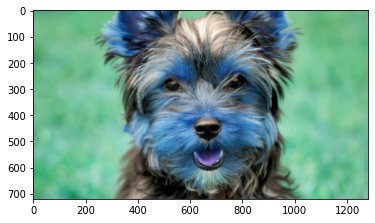

In [21]:
img1 = cv2.imread(sourcePath + 'pic8.jpg')
img2 = cv2.imread(sourcePath + 'pic8.jpg')
plt.imshow(img1)
plt.show()

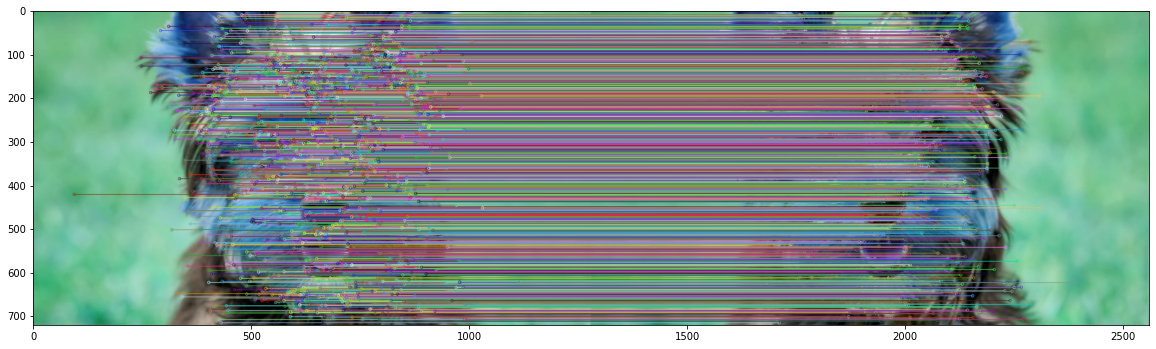

In [22]:
sift = cv2.xfeatures2d.SIFT_create()

kp1, desc1 = sift.detectAndCompute(img1, None)
kp2, desc2 = sift.detectAndCompute(img2, None)

index_params = dict(algorithm=0, trees=5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(desc1, desc2, k=2)

good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

img_matches = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize = (20,10))
plt.imshow(img_matches)

Em seguida aplicamos a correspondência de características entre duas imagens usando o algoritmo ORB (Oriented FAST and Rotated BRIEF) e o método Brute-Force Matcher (BFMatcher). Primeiramente, as imagens de entrada e de modelo são convertidas em escala de cinza. Em seguida, o algoritmo ORB é aplicado em ambas as imagens para extrair pontos-chave e descritores associados.

Em seguida, o objeto BFMatcher é criado usando a distância de Hamming como métrica de distância e a opção crossCheck como True para realizar uma correspondência de pontos-chave bidirecional.

Depois disso, as correspondências são classificadas pelo seu nível de similaridade, ordenando os pontos-chave correspondentes em ordem crescente de acordo com a distância de Hamming

In [23]:
input_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
template_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

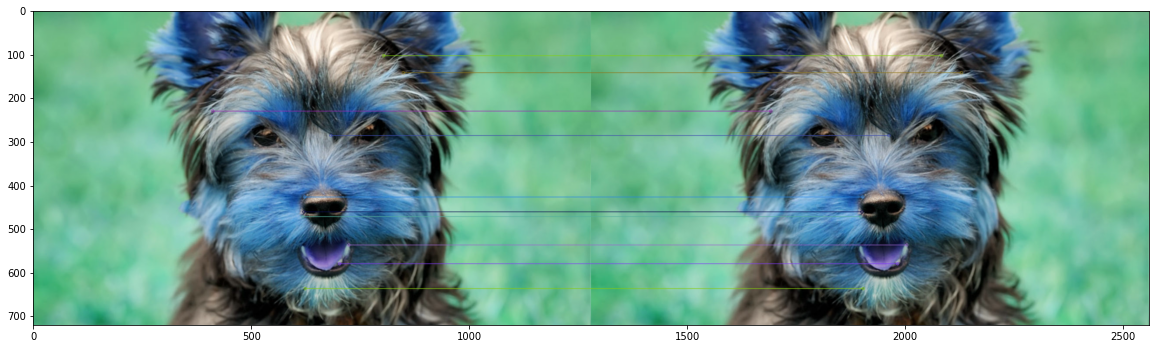

In [24]:
orb = cv2.ORB_create()
kp1, desc1 = orb.detectAndCompute(input_gray, None)
kp2, desc2 = orb.detectAndCompute(template_gray, None)


bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(desc1, desc2)

matches = sorted(matches, key = lambda x:x.distance)


img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize = (20,10))
plt.imshow(img_matches)


Implementamos uma detecção de correspondências baseada na técnica de template matching usando o método de correlação de coeficientes normalizados (Normalized Cross-Correlation - TM_CCOEFF_NORMED).

Primeiramente, as imagens são convertidas em escala de cinza usando a função cv2.cvtColor(). Em seguida, o método ORB (Oriented FAST and Rotated BRIEF) é utilizado para detectar e extrair descritores de pontos-chave (kp1, desc1) da imagem de entrada e da imagem-template (kp2, desc2), respectivamente.

Em seguida, é aplicado à imagem de entrada e a imagem-template em escala de cinza, utilizando o método de correlação de coeficientes normalizados. Onde o mapa de correspondência é então examinado em busca de valores que excedem um limiar de 0.2 e um retângulo é desenhado na imagem de entrada (img1) nas áreas onde a correspondência foi encontrada.

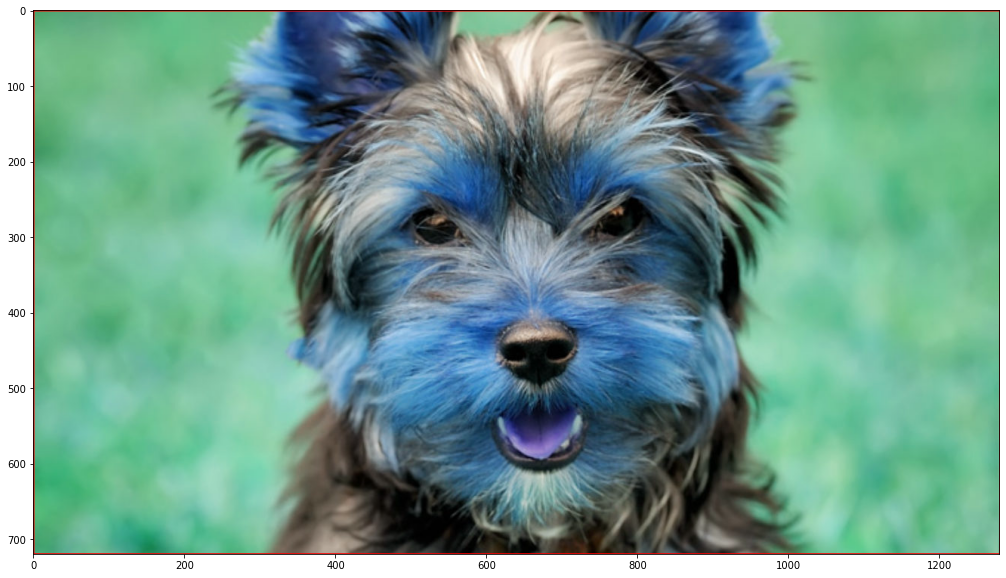

In [25]:
w, h = template_gray.shape[::-1]

result = cv2.matchTemplate(input_gray, template_gray, cv2.TM_CCOEFF_NORMED)

loc = np.where(result >= 0.2)

if len(loc[0]) > 0:
    for pt in zip(*loc[::-1]):
        cv2.rectangle(img1, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), 2)

min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

top_left = max_loc
bottom_right = (top_left[0] + img2.shape[1], top_left[1] + img2.shape[0])
img_matches = cv2.rectangle(img1, top_left, bottom_right, 255, 2)

plt.figure(figsize = (100,10))
plt.imshow(img_matches)

5. Aplique o filtro LoG em pelo menos 6 escalas distintas (você pode
usar a OpenCV). Em seguida, implemente um algoritmo que determina se
um pixel (x, y, s)  é um máximo local no espaço de posição-escala. Aplique
este algoritmo em todos os pixels das imagens resultantes para encontrar
estes extremos, e pinte estes pixels de uma cor diferente. Exiba as imagens
resultantes. Obs.: você não precisa aplicar na imagem de menor e maior
escala, nem nos pixels do bordo da imagem, visto que eles não tem uma
vizinhança completa.

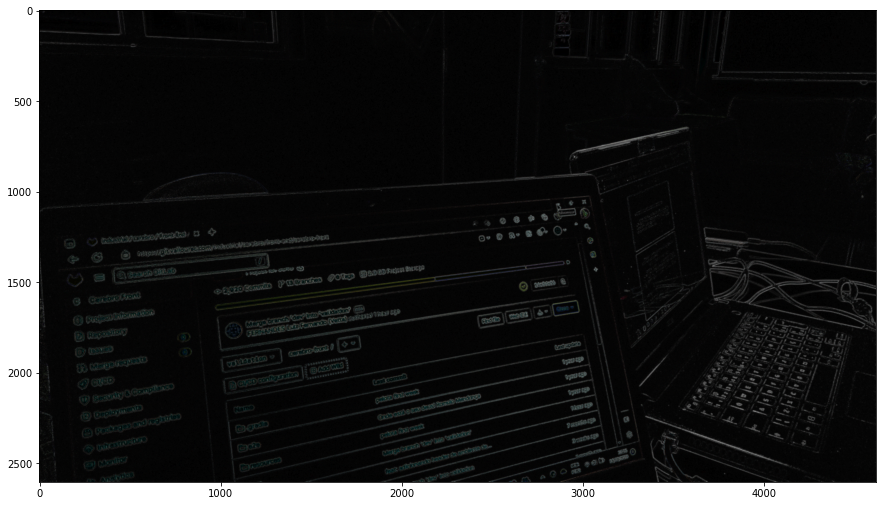

In [26]:
def LoG(img, k = 5, sigmaX = 0, n=5):
  img_blur = cv2.GaussianBlur(img, (k, k), sigmaX)
  img_lap = cv2.Laplacian(img_blur, cv2.CV_64F)
  img_lap = np.uint8(np.absolute(img_lap))
  cv2.normalize(img_lap, img_lap, 0, 255, cv2.NORM_MINMAX)
  plt.figure(figsize=(15, 15))
  plt.imshow(img_lap)
  plt.show()

pic1 = cv2.imread(sourcePath + 'pic1.jpg')
LoG(pic1)